In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score

from preprocessamento import *
from geracaoDeTabelas import gerar_todos_os_graficos
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA

from mpl_toolkits import mplot3d

Importing Jupyter notebook from preprocessamento.ipynb
Importing Jupyter notebook from geracaoDeTabelas.ipynb


In [2]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [3]:
dados_csv = pd.concat([dados_2015, dados_2016])

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [4]:
dados_csv.shape

(466, 55)

In [5]:
dados_csv.columns

Index(['Assinale DOIS fatores que você acredita que o ajudarão a concluir o curso com êxito:',
       'Assinale as DUAS principais dificuldades que você percebe influenciar a conclusão do curso:',
       'Assinale as DUAS principais dificuldades que você percebeu influenciar a conclusão do curso:',
       'Com qual cor/etnia você se identifica?',
       'Com quem você está morando atualmente?',
       'Como você avalia sua motivação em relação ao curso que escolheu?',
       'Como você tomou conhecimento do curso de sua escolha aqui na UFC de Quixadá?',
       'Curso em que você está matriculado:',
       'De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Julgo que o meu curso me permitirá me realizar profissionalmente.]',
       'De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Mesmo que pudesse, não mudaria de curso.]',
       'De acordo com sua percepção sobre sua vida acad

In [6]:
y_2015 = gerar_target(dados_2015)
y_2016 = gerar_target(dados_2016)

y = pd.concat([y_2015, y_2016])

In [7]:
df_2015 = preprocessar(dados_2015)
df_2016 = preprocessar(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

In [8]:
data_frame.columns

Index(['filhos', 'afinidade_linguagens', 'afinidade_humanas',
       'afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso'],
      dtype='object')

NameError: name 'X' is not defined

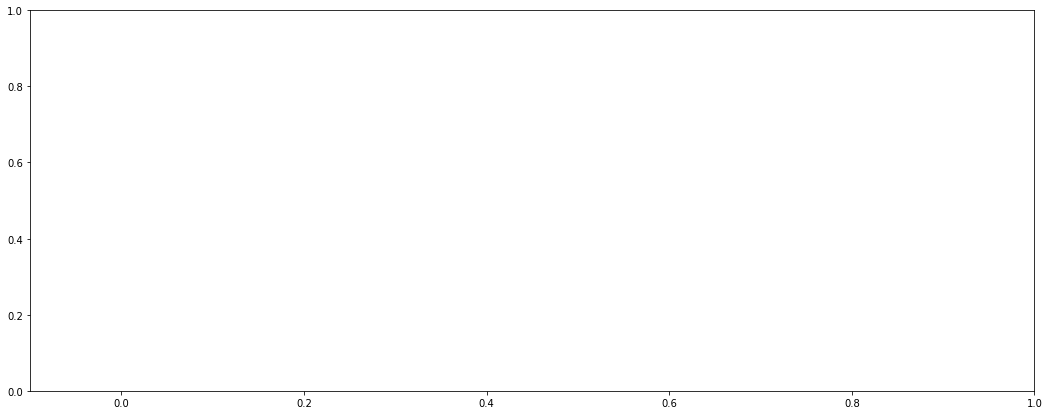

In [9]:
n_clusters = [2,3,4,5,6,7,8,9,10]

modelos_kmeans = 10

for n_cluster in n_clusters:
    # cria um plot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # define até onde o gráfico vai
    ax1.set_xlim([-0.1, 1])
    
    # inicializa o cluster com k = n_clusters
    clusterer = KMeans(n_clusters=n_cluster,
                       init='k-means++', 
                       n_init=10, 
                       max_iter=300, 
                       random_state=0)
    
    cluster_labels = clusterer.fit_predict(X)
    
    # O silhouette_score nos dá um valor média para todos os clusteres
    silhouette_avg = silhouette_score(data_frame, cluster_labels)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)
    
    # calcula os valores de cada objetivo
    sample_silhouette_values = silhouette_samples(data_frame, cluster_labels)
    y_lower = 10
    for i in range(n_cluster):
        # junta os silhouette scores para todos os elementos dentro do cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.show()

In [11]:
# clusterer = KMeans(n_clusters=2,
#                        init='k-means++', 
#                        n_init=10, 
#                        max_iter=300, 
#                        random_state=0)
    
# cluster_labels = clusterer.fit_predict(X)

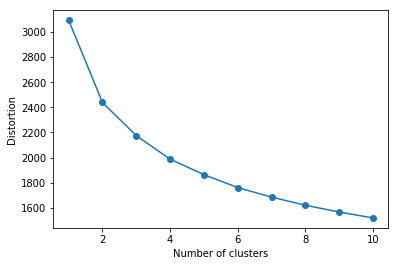

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(data_frame)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### DBSCAN

In [10]:
data_frame.shape

(466, 10)

In [11]:
X = normalize(data_frame)

Numero de cluster: 14


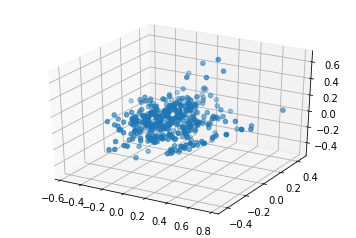

In [21]:
pca = PCA(n_components=3, random_state=42)
X_train_pca  =  pca.fit_transform(X)

dbscan = DBSCAN(eps=0.02, min_samples=3, metric='cosine')
dbscan.fit(X_train_pca)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Numero de cluster: {}'.format( n_clusters_))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_pca[:,0:1], X_train_pca[:,1:2], X_train_pca[:,2:3]);

/home/igor/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Numero de cluster: 3


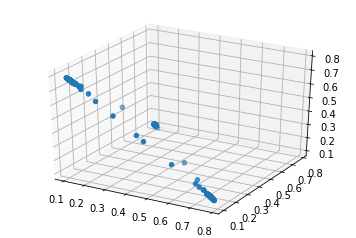

In [14]:
lda = LDA(n_components=3,random_state=42)
X_train_lda = lda.fit_transform(X, y)

dbscan = DBSCAN(eps=0.02, min_samples=3, metric='cosine')
dbscan.fit(X_train_lda)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Numero de cluster: {}'.format( n_clusters_))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_lda[:,0:1], X_train_lda[:,1:2], X_train_lda[:,2:3]);

In [13]:
data_frame['cluster_id'] = labels
data_frame['label'] = y
data_frame['Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]'] = dados_csv['Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]']
data_frame['Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]'] = dados_csv['Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]']
data_frame['Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]'] = dados_csv['Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]']
data_frame['Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]'] = dados_csv['Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]']
data_frame['Tem filhos?'] = dados_csv['Tem filhos?']
data_frame['Como você avalia sua motivação em relação ao curso que escolheu?'] = dados_csv['Como você avalia sua motivação em relação ao curso que escolheu?']
data_frame['Indique em que medida você conhece sobre o curso de sua escolha: [As atividades e tarefas exercidas durante o curso.]'] = dados_csv['Indique em que medida você conhece sobre o curso de sua escolha: [As atividades e tarefas exercidas durante o curso.]']
data_frame['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Julgo que o meu curso me permitirá me realizar profissionalmente.]'] = dados_csv['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Julgo que o meu curso me permitirá me realizar profissionalmente.]']
data_frame['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Pretendo concluir meu curso nesta instituição.]'] = dados_csv['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Pretendo concluir meu curso nesta instituição.]']
data_frame['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Mesmo que pudesse, não mudaria de curso.]'] = dados_csv['De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Mesmo que pudesse, não mudaria de curso.]']
data_frame['Situação'] = dados_csv['situacao']

In [14]:
cluster_0 = data_frame[data_frame['cluster_id'] == 0]
cluster_1 = data_frame[data_frame['cluster_id'] == 1]
cluster_2 = data_frame[data_frame['cluster_id'] == 2]
outlier = data_frame[data_frame['cluster_id'] == -1]

In [15]:
cluster_0.columns

Index(['filhos', 'afinidade_linguagens', 'afinidade_humanas',
       'afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso',
       'cluster_id', 'label',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]',
       'Tem filhos?',
       'Como você avalia sua motivação em relação ao curso que escolheu?',
       'Indique em que medida você conhece sobre o curso de sua escolha: [As atividades e tarefas exercidas durante o curso.]',
       'De acordo com sua percepç

In [16]:
cluster_0 = cluster_0.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

cluster_1 = cluster_1.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

cluster_2 = cluster_2.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

outlier = outlier.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

In [17]:
cluster_0.columns

Index(['Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]',
       'Tem filhos?',
       'Como você avalia sua motivação em relação ao curso que escolheu?',
       'Indique em que medida você conhece sobre o curso de sua escolha: [As atividades e tarefas exercidas durante o curso.]',
       'De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Julgo que o meu curso me permitirá me realizar profissionalmente.]',
       'De acordo com sua percepção sobre sua vida acadêmica neste início de curso, assinale os itens a seguir: [Pretendo concluir meu curso

In [18]:
colunas = ['Tem filhos?', 'Afinidade com Linguagens, códigos e suas tecnologias.','Afinidade com Ciências humanas e suas tecnologias.',
           'Afinidade com Matemática e suas tecnologias.', 'Afinidade com Ciências da natureza e suas tecnologias.',
           'Como você avalia sua motivação em relação ao curso que escolheu?', 
           'O quanto você conhece as As atividades e tarefas exercidas durante o curso.', 'Julga que o teu curso permitirá lhe  realizar profissionalmente?',
           'Pretende concluir seu curso nesta instituição?', 'Mesmo que pudesse, mudaria de curso?']

In [22]:
def gerar_graficos(dados, coluna, cluster):
    data = dados[coluna].value_counts()
    data.plot(kind='barh', title=coluna,figsize=(17, 9))
    plt.savefig('../imagens/2015_2016/'+ cluster + '/' + coluna + '.jpg')

In [20]:
def gerar_todos_graficos(cluster, nome_cluster):
    for coluna in cluster.columns:
        gerar_graficos(cluster, coluna, nome_cluster)

In [21]:
# def gerar_graficos(dados, coluna, cluster):
#     data = cluster_0[coluna].value_counts()
#     data.plot(kind='barh', title=coluna,figsize=(15, 9))
#     plt.savefig('../imagens/2015_2016/'+ cluster + '/' + coluna + '.jpg')

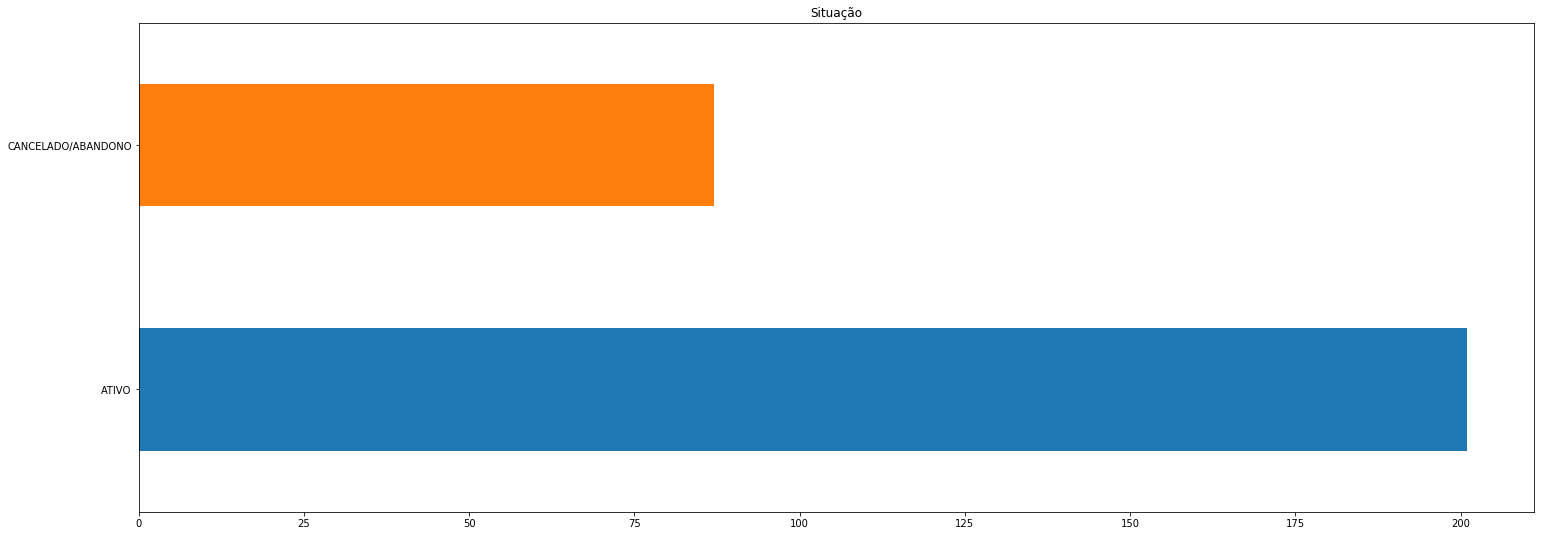

In [24]:
gerar_todos_graficos(cluster_0, 'cluster_0')
_data = cluster_0["Situação"].value_counts()
_data.plot(kind='barh', title="Situação",figsize=(25, 9))
plt.savefig('../imagens/2015_2016/cluster_0/Situação.jpg')

gerar_todos_graficos(cluster_1, 'cluster_1')
_data = cluster_1["Situação"].value_counts()
_data.plot(kind='barh', title="Situação",figsize=(25, 9))
plt.savefig('../imagens/2015_2016/cluster_1/Situação.jpg')

gerar_todos_graficos(cluster_2, 'cluster_2')
_data = cluster_2["Situação"].value_counts()
_data.plot(kind='barh', title="Situação",figsize=(25, 9))
plt.savefig('../imagens/2015_2016/cluster_2/Situação.jpg')


gerar_todos_graficos(outlier, 'outlier')
_data = outlier["Situação"].value_counts()
_data.plot(kind='barh', title="Situação",figsize=(25, 9))
plt.savefig('../imagens/2015_2016/outlier/Situação.jpg')


In [34]:
def _gerar_target(df):
    new_df = pd.DataFrame()
    new_df['situacao'] = pd.Series(["Evadido" if s != "ATIVO" else "Não evadido" for s in df['Situação']])
    
    return new_df

In [37]:
y_data_frame = _gerar_target(data_frame)

In [39]:
data_frame['Situação'] = y_data_frame

In [42]:
evadidos = data_frame[data_frame['Situação'] == 'Evadido']
nao_evadidos = data_frame[data_frame['Situação'] == 'Não evadido']

In [72]:
def gerar_graficos_por_classe(df, coluna, pasta):
    data = df[coluna].value_counts()
    data.plot(kind='barh', title=coluna,figsize=(17, 9))
    plt.savefig('../imagens/2015_2016/' +pasta +"/" + coluna + '.jpg')

def gerar_todos_graficos_por_classe(cluster, nome_cluster):
    for coluna in cluster.columns:
        gerar_graficos(cluster, coluna, nome_cluster)

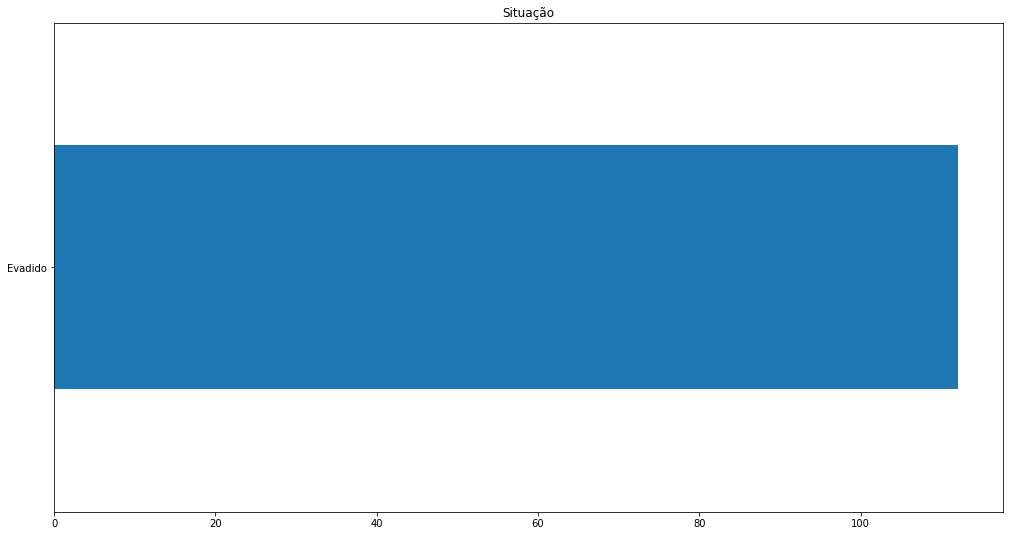

In [52]:
for coluna in evadidos:
    gerar_graficos_por_classe(evadidos, coluna)

In [58]:
evadidos.columns

Index(['filhos', 'afinidade_linguagens', 'afinidade_humanas',
       'afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso',
       'cluster_id', 'label',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]',
       'Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]',
       'Tem filhos?',
       'Como você avalia sua motivação em relação ao curso que escolheu?',
       'Indique em que medida você conhece sobre o curso de sua escolha: [As atividades e tarefas exercidas durante o curso.]',
       'De acordo com sua percepç

In [59]:
nao_evadidos = nao_evadidos.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

evadidos = evadidos.drop(columns=['filhos', 'afinidade_linguagens', 'afinidade_humanas','afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso', 'cluster_id', 'label'])

In [71]:
evadidos.shape

(112, 11)

In [75]:
nao_evadidos.shape

(354, 11)

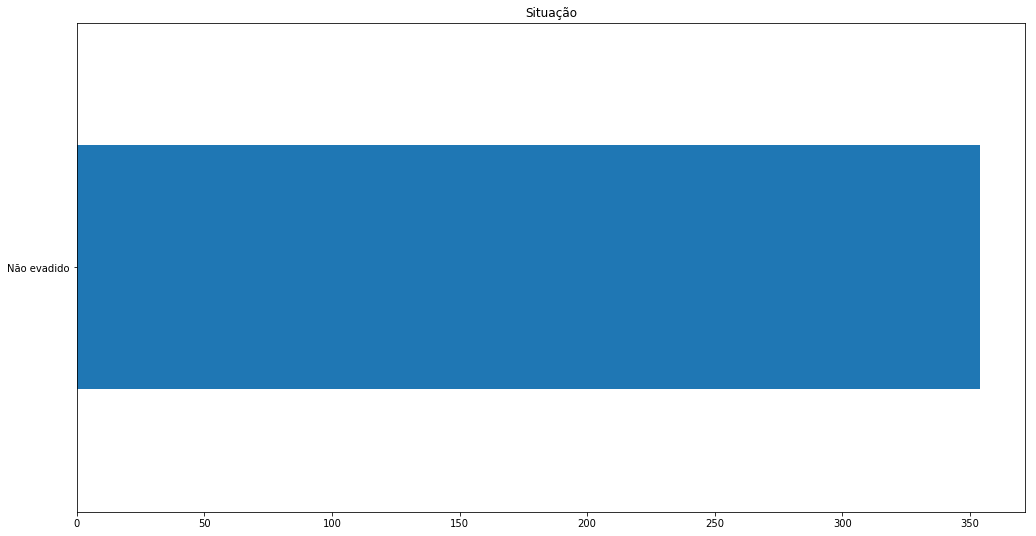

In [77]:
for coluna in nao_evadidos:
    gerar_graficos_por_classe(nao_evadidos, coluna, "não_evadidos")


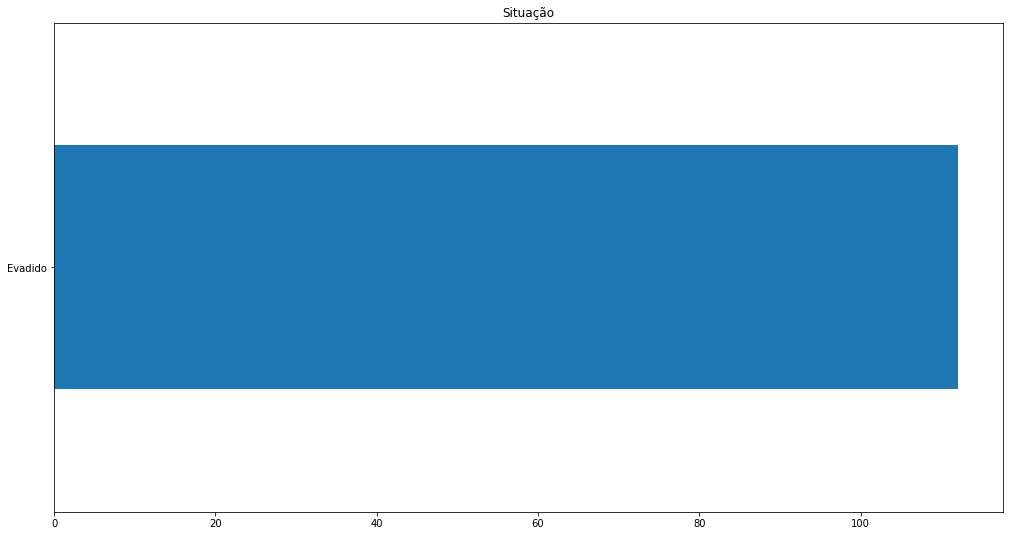

In [78]:
for coluna in evadidos:
    gerar_graficos_por_classe(evadidos, coluna, "evadidos")